[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.2 Szenarien-Residuallast


In [8]:
import sys
sys.path.append("..\\")
sys.path

['c:\\Users\\Simon Schneider\\PycharmProjects\\FLUCCOplus\\notebooks',
 'c:\\ProgramData\\anaconda3\\python311.zip',
 'c:\\ProgramData\\anaconda3\\DLLs',
 'c:\\ProgramData\\anaconda3\\Lib',
 'c:\\ProgramData\\anaconda3',
 '',
 'C:\\Users\\Simon Schneider\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'c:\\ProgramData\\anaconda3\\Lib\\site-packages',
 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32',
 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin',
 '..\\',
 '..\\']

In [9]:
# OPTIONAL: Load the "autoreload" extension so that code can change
#import config
import matplotlib.pyplot as plt

import FLUCCOplus.scenarios
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.scenarios import Scenario, Names #Comparison


Es wird hier alle Zukunftsszenarien für ein Jahr in csv-Dateien getrennt nach cutoffs gespeichert.

In [11]:
import FLUCCOplus.transform as traffo

asc = FLUCCOplus.scenarios.all()
ausbauscenarien = list(asc.index[3:])
base_year = 2019 # 2015,2016, 2017, 2018, 2019
cutoffs = [0.4,0.45,0.5,0.55]
szenario = "saisonale_speicher1"

exDf_cutoff40 = pd.DataFrame()
exDf_cutoff45 = pd.DataFrame()
exDf_cutoff50 = pd.DataFrame()
exDf_cutoff55 = pd.DataFrame()

basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
PV_ostwest = traffo.Transformation(kind="Photovoltaik", weights=[1.1,1,0.9,0.6,0.6,0.9,1,1.1], timeframe=24)
batteriespeicher = traffo.Transformation(kind="Photovoltaik", weights=[0.85, 0.85, 0.85, 0.6, 0.7, 0.8, 1.05, 1.3], timeframe=24)


for s in ausbauscenarien:
    scenario_name = s
    scenario = Scenario(
        name = scenario_name,
        scenario = scenario_name,
        em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
    )

    scenario.reset()
    scenario.apply([saisonale_speicher1], reset=True)
    #scenario.define_signal("RES0", separator=0.5)

    signals = pd.DataFrame()

    for i, c in enumerate(cutoffs):
        scenario.define_signal("RES0", separator=c)
        #scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
        signals[f"{c*100} %"] = scenario.signal

    exDf_cutoff40[s] = signals["40.0 %"]
    exDf_cutoff45[s] = signals["45.0 %"]
    exDf_cutoff50[s] = signals["50.0 %"]
    exDf_cutoff55[s] = signals[f"{c*100} %"]

if not os.path.exists(f"../Data/interim/{szenario}_{base_year}"):
        os.makedirs(f"../Data/interim/{szenario}_{base_year}")

exDf_cutoff40.to_csv(config.DATA_INTERIM/f"{szenario}_{base_year}" / f"RES0_{szenario}_{base_year}-40.csv", sep=";", decimal=",")
exDf_cutoff45.to_csv(config.DATA_INTERIM/f"{szenario}_{base_year}" / f"RES0-{szenario}_{base_year}-45.csv", sep=";", decimal=",")
exDf_cutoff50.to_csv(config.DATA_INTERIM/f"{szenario}_{base_year}" / f"RES0-{szenario}_{base_year}-50.csv", sep=";", decimal=",")
exDf_cutoff55.to_csv(config.DATA_INTERIM/f"{szenario}_{base_year}" / f"RES0-{szenario}_{base_year}-55.csv", sep=";", decimal=",")

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\workshee

In [12]:
ausbauscenarien

['Energie und Klimazukunft 2030 (Veigl17)',
 'Erneuerbare Energie 2030 (UBA16)',
 'WEM 2030 (UBA17)',
 'Transition 2030 (UBA17)',
 'Energie und Klimazukunft 2050 (Veigl17)',
 'Erneuerbare Energie 2050 (UBA16)',
 'WEM 2050 (UBA17)',
 'Transition 2050 (UBA17)',
 '100% Erneuerbare Deckung 2050 (FLUCCO+)',
 '100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)',
 '100% Erneuerbare Deckung 2050 ohne Speicherausbau (FLUCCO+)']

Ab hier erfolg die detaillierte Analyse momentan nur noch mit einem Ausbauszenario

In [13]:
scenario_name = Names.flucco_2050

base_scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


KeyError: 'Erzeugung'

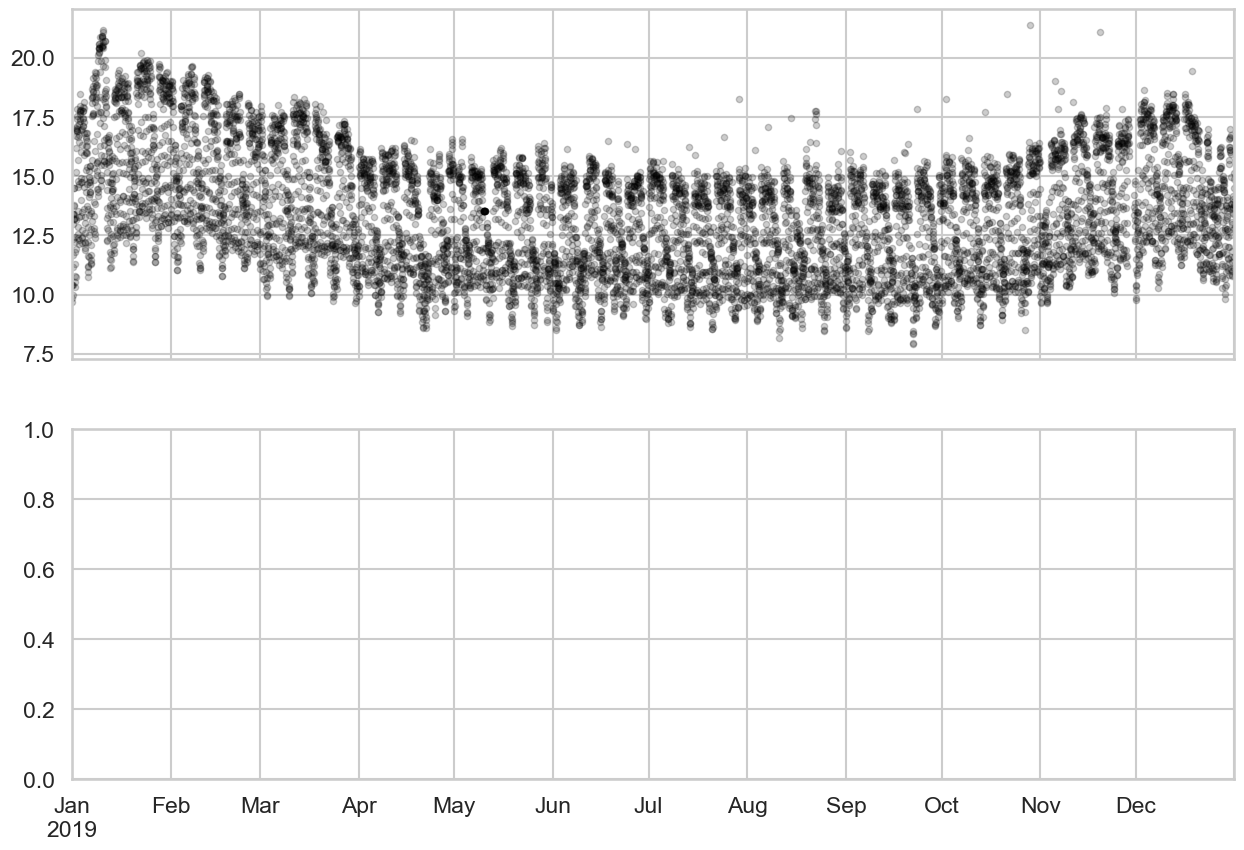

In [14]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)

scenario.plot_supplydemand(ax=ax[0], hourly=True, kind="line")
scenario.plot_supplydemand(ax=ax[1], daily=True, kind="area", legend=True)
[axx.set_ylabel("GW") for axx in ax]
ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)
ax[1].set_xlabel("")

KeyError: 'Erzeugung'

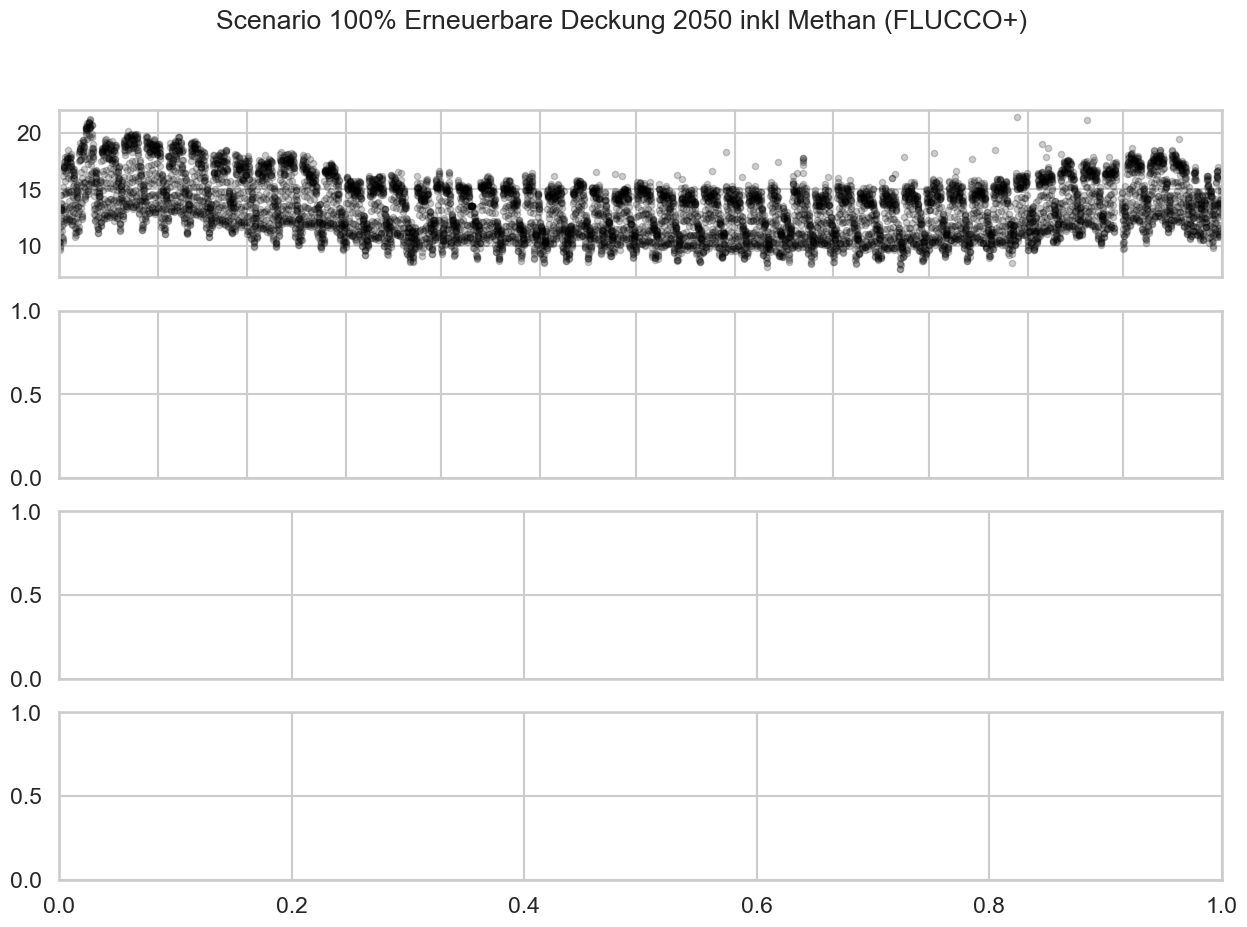

In [ ]:
scenario.reset()
fig, ax = scenario.plot()

plt.savefig(config.PLOTS / "Lineares_Szenario.png", dpi=300)

In [ ]:
scenario.TSD

In [ ]:
scenario

In [ ]:
scenario.plot_monthly_mismatch()

In [ ]:
import FLUCCOplus.transform as traffo
basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
fig,ax = plt.subplots(1,1, figsize = (15,10))
saisonale_speicher1.plot(ax=ax, line_color="blue")
saisonale_speicher2.plot(ax=ax, line_color="red")
saisonale_speicher3.plot(ax=ax, line_color="green")


In [ ]:
scenario.reset()
scenario.apply([basis], reset=True)
fig, ax = scenario.plot()
fig.suptitle("Scenario inkl. saisonaler Speicherung");
plt.savefig(config.PLOTS / "Speicherszenario.png", dpi=300)

In [ ]:
scenario.define_signal("RES0", separator=0.5)


In [ ]:

scenario.plot_energy_mix()


In [ ]:
scenario.signal

In [ ]:
scenario.plot_signal();

In [ ]:
cutoffs = [0.4,0.45,0.5,0.55]

fig, ax = plt.subplots(4,3, figsize=(15,10), gridspec_kw={'width_ratios':[6,1,1]})
signals = pd.DataFrame()

for i, c in enumerate(cutoffs):
    scenario.define_signal("RES0", separator=c)
    scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
    signals[f"{c*100} %"] = scenario.signal

In [ ]:
signals

In [ ]:
if not os.path.exists("../Data/interim"):
        os.makedirs("../Data/interim")

In [ ]:
#Flucco_RES0 = pd.DataFrame()
#Flucco_RES0["100% Erneuerbare Deckung 2050 (FLUCCO+)"] = signals["50.0 %"]
#Flucco_RES0.to_csv(config.DATA_INTERIM / "FLUCCO_RES0_50.csv", sep=";", decimal=",")

In [ ]:
signals.to_csv(config.DATA_INTERIM / "RES0-40-55.csv", sep=";", decimal=",")

In [ ]:
# c1 = Comparison(base_scenario, scenario)